In [241]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [242]:
import numpy as np

from matplotlib import pyplot as plt

import json

import utils

from modules import helpers, fitting

import importlib
importlib.reload(utils)
importlib.reload(helpers)
importlib.reload(fitting)

helpers.set_plot_configs()

In [243]:
DataReader = utils.MCAData()

bins, counts, _, _ = DataReader._read_data('data/2025-03-04/recoil_120_0304.Spe')
kde_bins, kde, kde_err = DataReader._kde_smooth_data(bins, counts, bw=3)

In [244]:
kde

array([4.38410595e-07, 1.55132288e-06, 4.94095207e-06, ...,
       7.68620588e-29, 2.32103306e-30, 6.27185050e-32])

In [245]:
bins.size

2048

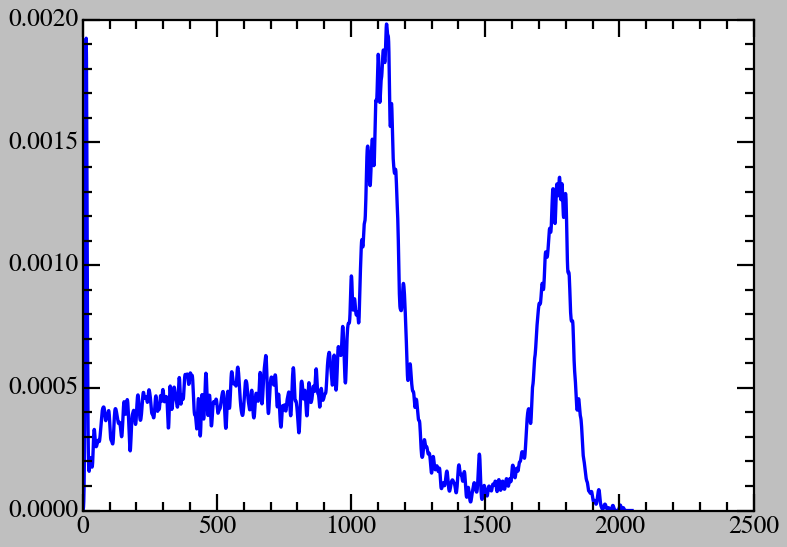

In [246]:
fig, ax = plt.subplots(figsize=(10, 7))

# ax.plot(bins, counts)
# ax.errorbar(kde_bins, kde, yerr=kde_err,
#             fmt=' s',markersize=5,elinewidth=2,capsize=5)

ax.plot(kde_bins, kde)

#ax.set_yscale('log')

plt.tight_layout()
plt.show()